In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import i0
import pandas as pd
import sympy as sp
import mpmath as mp
%matplotlib inline

In [19]:
L1, L2, L3,T0, q, k, x, y = sp.symbols('L1 L2 L3 T0 q k x y') # Defining the symbols
n,m = sp.symbols('n m', integer = True) # Defining the m and as integers for the simplifications of solution

In [20]:
v = (q/(2*k))*x*(L1-x)
v

q*x*(L1 - x)/(2*k)

In [21]:
f = (T0-v)*sp.sin((n*sp.pi*y)/L2)*sp.sin((m*sp.pi*x)/L1)
f

(T0 - q*x*(L1 - x)/(2*k))*sin(pi*m*x/L1)*sin(pi*n*y/L2)

In [22]:
sp.simplify(sp.integrate(f, (x, 0, L1), (y, 0, L2)))

Piecewise((L1*L2*(L1**2*q - pi**2*T0*k*m**2)*((-1)**m + (-1)**n - (-1)**(m + n) - 1)/(pi**4*k*m**3*n), Ne(m, 0) & Ne(pi*n/L2, 0)), (0, True))

In [4]:
def cuboidTemperatureDistribution(terms,x,L1,y,L2,z,L3,T,q,k):
    def cuboidTemperatureDistributionH(m,n,x,L1,y,L2,z,L3,T):
        kmn = (((2*m+1)*np.pi/L1)**2 + ((2*n+1)*np.pi/L2)**2)**0.5
        term1 = 16*(T*k*(np.pi**2)*((2*m+1)**2) - q*L1**2)/((2*n+1)*k*((2*m+1)**3)*np.pi**4)
        term2 = mp.sin((2*m+1)*np.pi*x/L1)
        term3 = mp.sin((2*n+1)*np.pi*y/L2)
        x = mp.sinh(kmn*z)
        y = mp.sinh(kmn*L3)
        term4 = x/y
        
        return term1*term2*term3*term4
    ans = 0
    for i in range(terms) :
        for j in range(terms):
            ans += cuboidTemperatureDistributionH(i,j,x,L1,y,L2,z,L3,T)
    return ans + (q/(2*k))*x*(L1-x)

In [24]:
cuboidTemperatureDistribution(1000,0.3,0.5,0.3,0.5,0.5,0.5,300,0,50)

mpf('355.18684087417705')

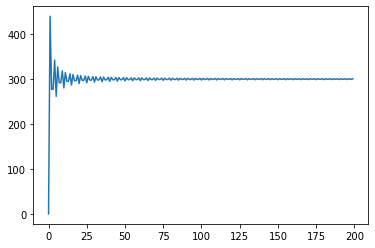

In [30]:
x = np.arange(200)
z = []
for i in x :
    z.append(cuboidTemperatureDistribution(i,0.3,0.5,0.3,0.5,0.5,0.5,300,0,50))
plt.plot(x,z)

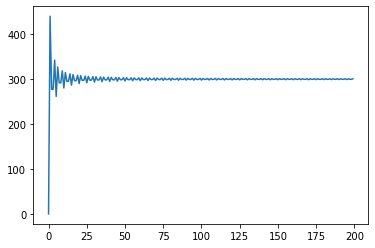

In [31]:
x = np.arange(200)
z = []
for i in x :
    z.append(cuboidTemperatureDistribution(i,0.3,0.5,0.3,0.5,0.5,0.5,300,1000,50))
plt.plot(x,z)

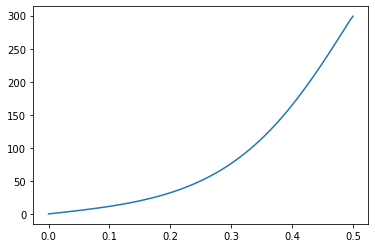

In [43]:
x = 0.25 # Position in x 
L1 = 0.5 # Max x for the cuboid 
y = 0.25 # Position in y 
L2 = 0.5 # Max y for the cuboid 
L3 = 0.5 # Max z for the cuboid 
T = 300 # Temperature at the Z = 0 Plane i.e The Boundary Condition
q = 0 
k = 50
terms = 200
z1 = np.linspace(0,L3,100)
tempz1 = []
for i in z :
    tempz1.append(cuboidTemperatureDistribution(terms,x,L1,y,L2,i,L3,T,q,k))
plt.plot(z1,tempz1)

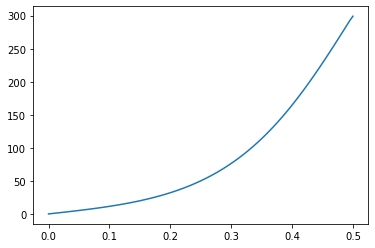

In [44]:
x = 0.25 # Position in x 
L1 = 0.5 # Max x for the cuboid 
y = 0.25 # Position in y 
L2 = 0.5 # Max y for the cuboid 
L3 = 0.5 # Max z for the cuboid 
T = 300 # Temperature at the Z = 0 Plane i.e The Boundary Condition
q = 1000 
k = 50
terms = 200
z = np.linspace(0,L3,100)
tempz = []
for i in z :
    tempz.append(cuboidTemperatureDistribution(terms,x,L1,y,L2,i,L3,T,q,k))
plt.plot(z,tempz)

In [11]:
df = pd.read_excel("cuboidzQ1000.xlsx")

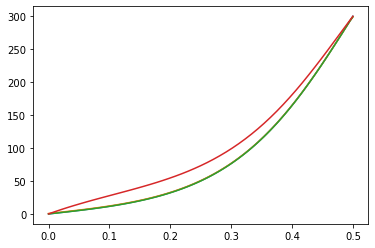

In [51]:
plt.plot(df["Z "],df["T"])
plt.plot(z,tempz)
plt.plot(z1,tempz1)
plt.plot(df["Z1"],df["T1"])

In [50]:
df.columns

Index(['Z ', 'T', 'Z1', 'T1'], dtype='object')

In [8]:
x = 0.25 # Position in x 
L1 = 0.5 # Max x for the cuboid 
y = 0.25 # Position in y 
L2 = 0.5 # Max y for the cuboid 
z = 0.25
L3 = 0.5 # Max z for the cuboid 
T = 300 # Temperature at the Z = 0 Plane i.e The Boundary Condition
q = 1000 
k = 60.5
cuboidTemperatureDistribution(300,x,L1,y,L2,z,L3,T,q,k)

mpf('50.445467799410608')

In [54]:
x = 0.25 # Position in x 
L1 = 0.5 # Max x for the cuboid 
y = 0.25 # Position in y 
L2 = 0.5 # Max y for the cuboid 
z = 0.25
L3 = 0.5 # Max z for the cuboid 
T = 300 # Temperature at the Z = 0 Plane i.e The Boundary Condition
q = 0 
k = 50
cuboidTemperatureDistribution(terms,x,L1,y,L2,z,L3,T,q,k)

mpf('50.000000000000014')

In [5]:
x = 0.25 # Position in x 
L1 = 0.5 # Max x for the cuboid 
y = 0.25 # Position in y 
L2 = 0.5 # Max y for the cuboid 
z = 0.25
L3 = 0.5 # Max z for the cuboid 
T = 300 # Temperature at the Z = 0 Plane i.e The Boundary Condition
q = 100000 
k = 60.5
cuboidTemperatureDistribution(200,x,L1,y,L2,z,L3,T,q,k)

mpf('94.546779941057366')

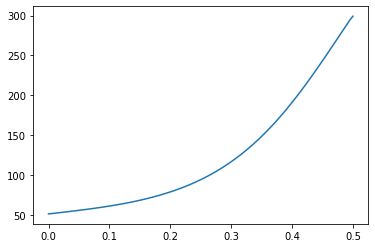

In [9]:
x = 0.25 # Position in x 
L1 = 0.5 # Max x for the cuboid 
y = 0.25 # Position in y 
L2 = 0.5 # Max y for the cuboid 
L3 = 0.5 # Max z for the cuboid 
T = 300 # Temperature at the Z = 0 Plane i.e The Boundary Condition
q = 100000 
k = 60.5
terms = 200
z = np.linspace(0,L3,100)
tempz = []
for i in z :
    tempz.append(cuboidTemperatureDistribution(terms,x,L1,y,L2,i,L3,T,q,k))
plt.plot(z,tempz)

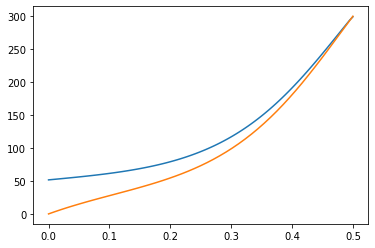

In [12]:
plt.plot(z,tempz)
plt.plot(df["Z1"],df["T1"])